# Insurance Costs Predictor - Exploratory Data Analysis

- Author: [Elom Gbogbo](https://github.com/egbogbo11/)
- Repository: [capstone-insurance-costs-predictor](https://github.com/egbogbo11/capstone-insurance-costs-predictor)
- Date: November 16, 2025

## 1. Data Acquisition

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pathlib import Path
import os

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Check current working directory
print("Current directory:", os.getcwd())
print("\nFiles in current directory:")
print(os.listdir('.'))

# Check if data folder exists
if os.path.exists('../data'):
    print("\n✓ 'data' folder found")
    print("Files in data folder:", os.listdir('../data'))
else:
    print("\n✗ 'data' folder NOT found in parent directory")

Current directory: c:\Repos\capstone-insurance-costs-predictor\notebooks

Files in current directory:
['demo_notebook (3).ipynb', 'demo_notebook (4).ipynb', 'demo_notebook.ipynb']

✓ 'data' folder found
Files in data folder: ['.gitkeep', 'insurance.csv']


In [3]:
# Load the dataset - try multiple possible paths
# NOTE: The insurance.csv file is missing its header row
# We'll add column names manually
possible_paths = [
    Path('../data/insurance.csv'),  # If notebook is in notebooks/
    Path('data/insurance.csv'),      # If notebook is in root
    Path('./insurance.csv'),         # If data is in same folder
]

# Define column names based on standard insurance dataset
column_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

df = None
for data_path in possible_paths:
    if data_path.exists():
        # Load with column names since CSV has no header
        df = pd.read_csv(data_path, names=column_names, header=None)
        print(f"✓ Data loaded successfully from {data_path}")
        print(f"Shape: {df.shape}")
        break

if df is None:
    print("✗ Could not find insurance.csv in any expected location")
    print("Searched:")
    for p in possible_paths:
        print(f"  - {p.absolute()}")

✓ Data loaded successfully from ..\data\insurance.csv
Shape: (1339, 7)


In [4]:
# Convert columns to proper data types
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['children'] = pd.to_numeric(df['children'], errors='coerce')
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

print("Data types after conversion:")
print(df.dtypes)
print(f"\nShape after conversion: {df.shape}")

Data types after conversion:
age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

Shape after conversion: (1339, 7)


## 2. Initial Data Inspection

In [5]:
# Display first few rows
print("First 10 rows:")
display(df.head(10))

First 10 rows:


,age,sex,bmi,children,smoker,region,charges
0,NaN,sex,NaN,NaN,smoker,region,NaN
1,19.0,female,27.900,0.0,yes,southwest,16884.92400
2,18.0,male,33.770,1.0,no,southeast,1725.55230
3,28.0,male,33.000,3.0,no,southeast,4449.46200
4,33.0,male,22.705,0.0,no,northwest,21984.47061
5,32.0,male,28.880,0.0,no,northwest,3866.85520
6,31.0,female,25.740,0.0,no,southeast,3756.62160
7,46.0,female,33.440,1.0,no,southeast,8240.58960
8,37.0,female,27.740,3.0,no,northwest,7281.50560
9,37.0,male,29.830,2.0,no,northeast,6406.41070


In [6]:
# Display last few rows
print("Last 5 rows:")
display(df.tail())

Last 5 rows:


,age,sex,bmi,children,smoker,region,charges
1334,50.0,male,30.97,3.0,no,northwest,10600.5483
1335,18.0,female,31.92,0.0,no,northeast,2205.9808
1336,18.0,female,36.85,0.0,no,southeast,1629.8335
1337,21.0,female,25.80,0.0,no,southwest,2007.9450
1338,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [7]:
# Data types and non-null counts
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1339 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1339 non-null   object 
 5   region    1339 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.4+ KB


In [8]:
# Column names
print("Column names:")
print(df.columns.tolist())

Column names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [9]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
display(missing_df)

Missing Values:


,Count,Percentage
age,1,0.074683
sex,0,0.000000
bmi,1,0.074683
children,1,0.074683
smoker,0,0.000000
region,0,0.000000
charges,1,0.074683


In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


## 3. Initial Descriptive Statistics

In [11]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics (Numerical):")
display(df.describe())

Descriptive Statistics (Numerical):


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Descriptive statistics for categorical columns
print("Descriptive Statistics (Categorical):")
display(df.describe(include='object'))

Descriptive Statistics (Categorical):


,sex,smoker,region
count,1339,1339,1339
unique,3,3,5
top,male,no,southeast
freq,676,1064,364


In [13]:
# Data types summary
print("Data Types:")
print(df.dtypes)

Data Types:
age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object


## 4. Initial Data Distribution for Numerical Columns

In [ ]:
# Identify numerical columns (after type conversion)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

if len(numerical_cols) == 0:
    print("\WARNING: No numerical columns found!")
    print("Current data types:")
    print(df.dtypes)

Numerical columns (4): ['age', 'bmi', 'children', 'charges']


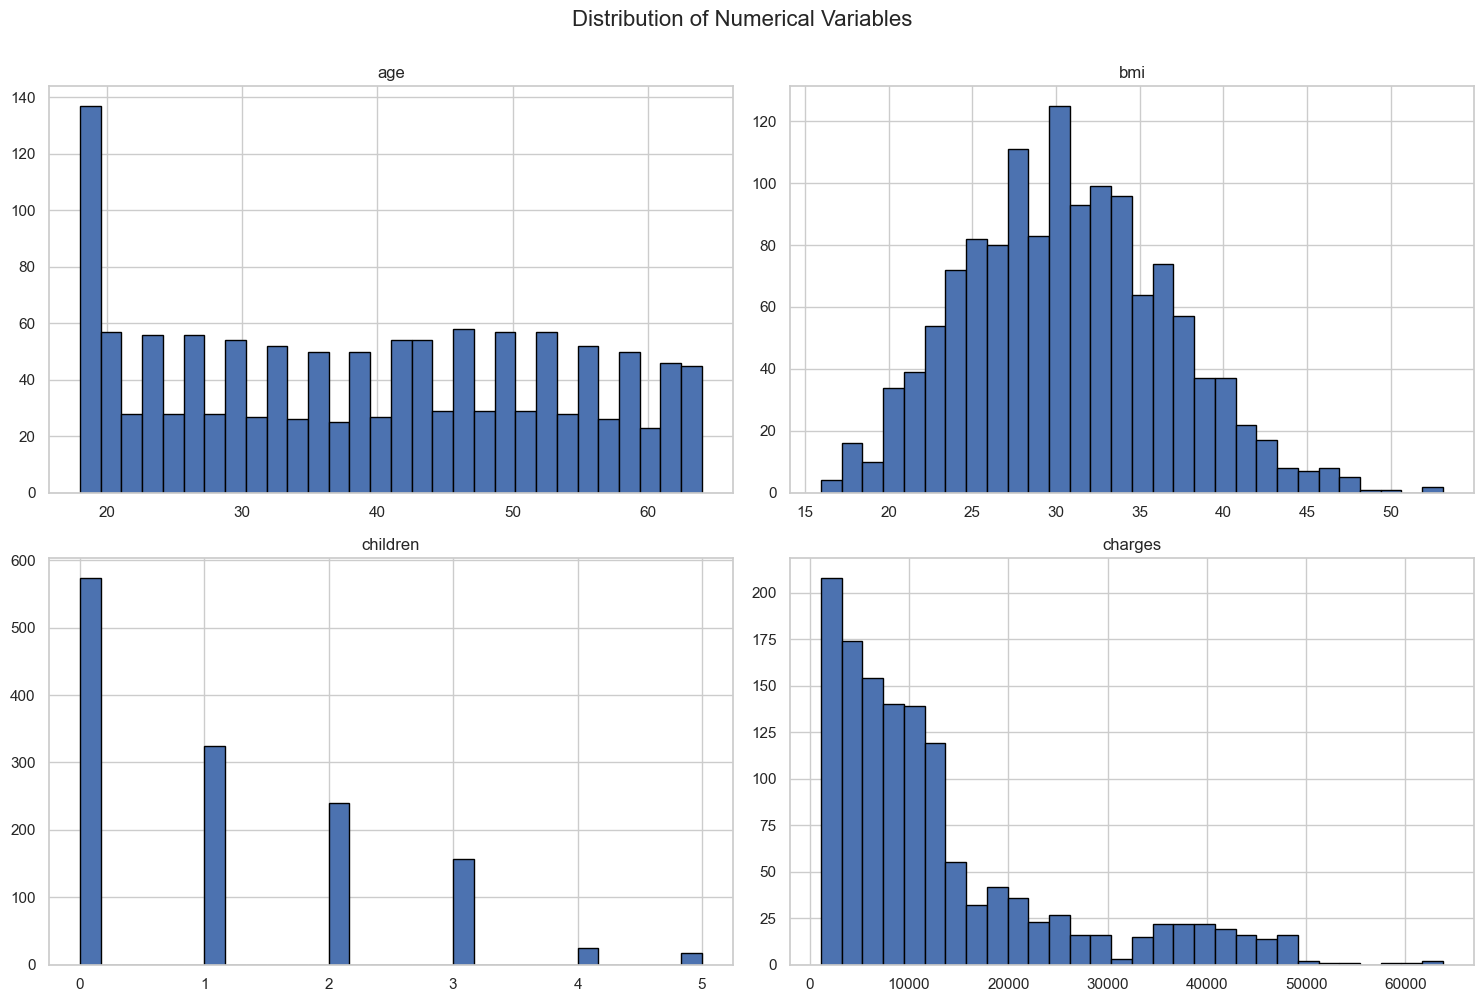

In [15]:
# Histograms for numerical columns
if len(numerical_cols) > 0:
    df[numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No numerical columns to plot")

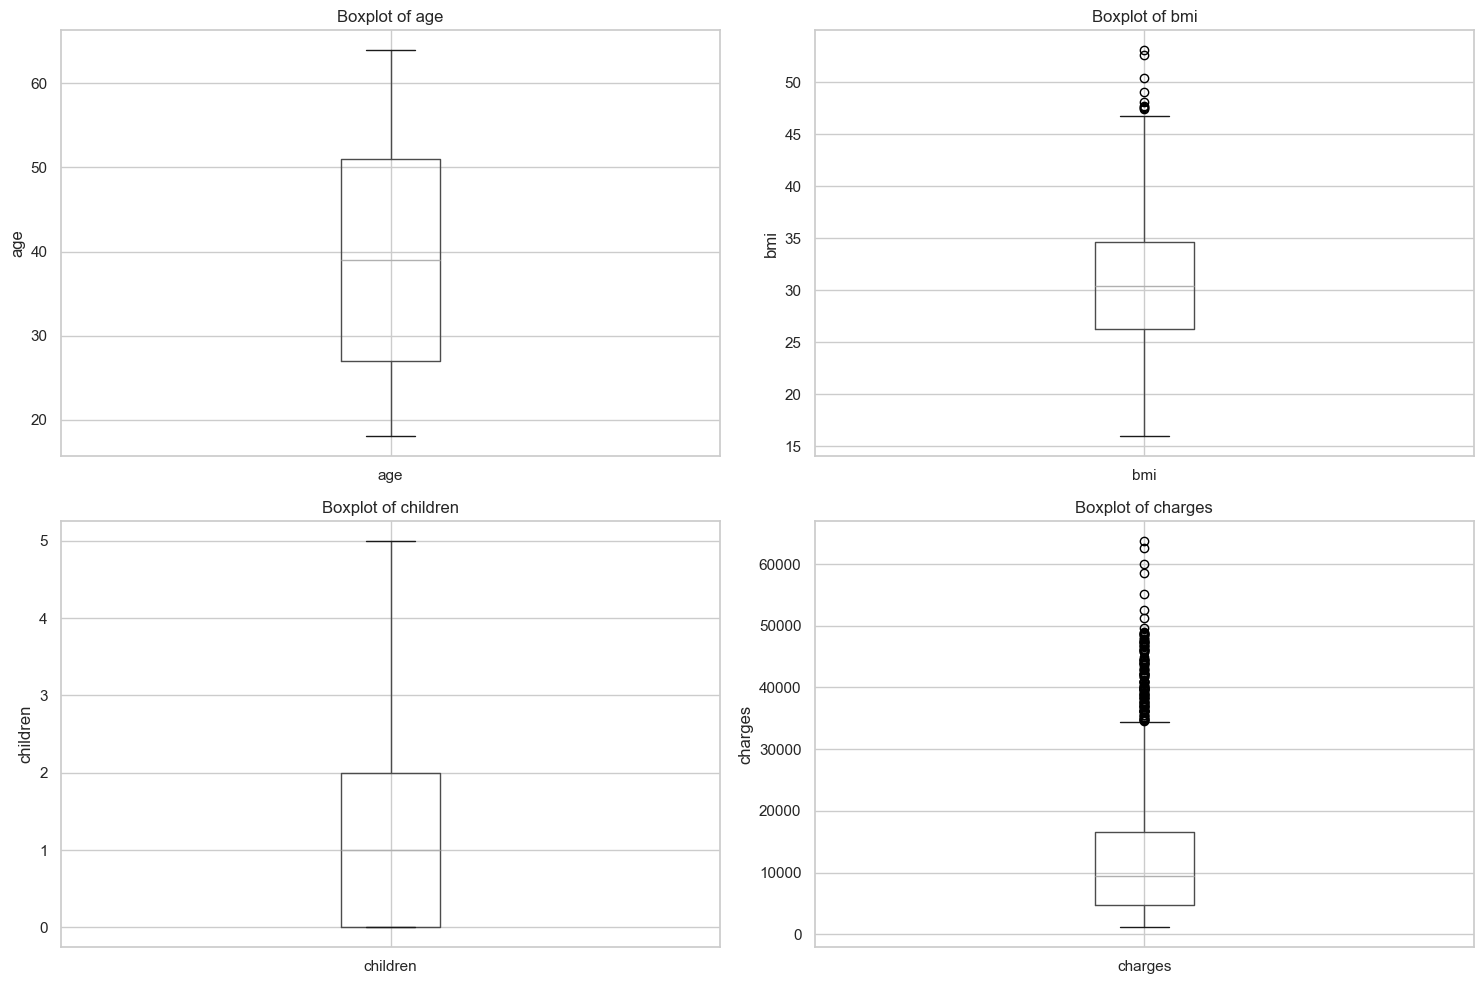

In [16]:
# Box plots for numerical columns to identify outliers
if len(numerical_cols) > 0:
    n_plots = min(len(numerical_cols), 4)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for idx, col in enumerate(numerical_cols[:4]):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot of {col}')
        axes[idx].set_ylabel(col)

    # Hide empty subplots if less than 4 numerical columns
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No numerical columns to plot")

In [17]:
# Statistical summary with additional metrics
if len(numerical_cols) > 0:
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Min: {df[col].min():.2f}")
        print(f"  Max: {df[col].max():.2f}")
else:
    print("⚠️ No numerical columns found")


age:
  Mean: 39.21
  Median: 39.00
  Std Dev: 14.05
  Min: 18.00
  Max: 64.00

bmi:
  Mean: 30.66
  Median: 30.40
  Std Dev: 6.10
  Min: 15.96
  Max: 53.13

children:
  Mean: 1.09
  Median: 1.00
  Std Dev: 1.21
  Min: 0.00
  Max: 5.00

charges:
  Mean: 13270.42
  Median: 9382.03
  Std Dev: 12110.01
  Min: 1121.87
  Max: 63770.43


## 5. Initial Data Distribution for Categorical Columns

In [18]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Categorical columns (3): ['sex', 'smoker', 'region']


In [19]:
# Value counts for each categorical column
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


sex:
sex
male      676
female    662
sex         1
Name: count, dtype: int64
Unique values: 3

smoker:
smoker
no        1064
yes        274
smoker       1
Name: count, dtype: int64
Unique values: 3

region:
region
southeast    364
northwest    325
southwest    325
northeast    324
region         1
Name: count, dtype: int64
Unique values: 5


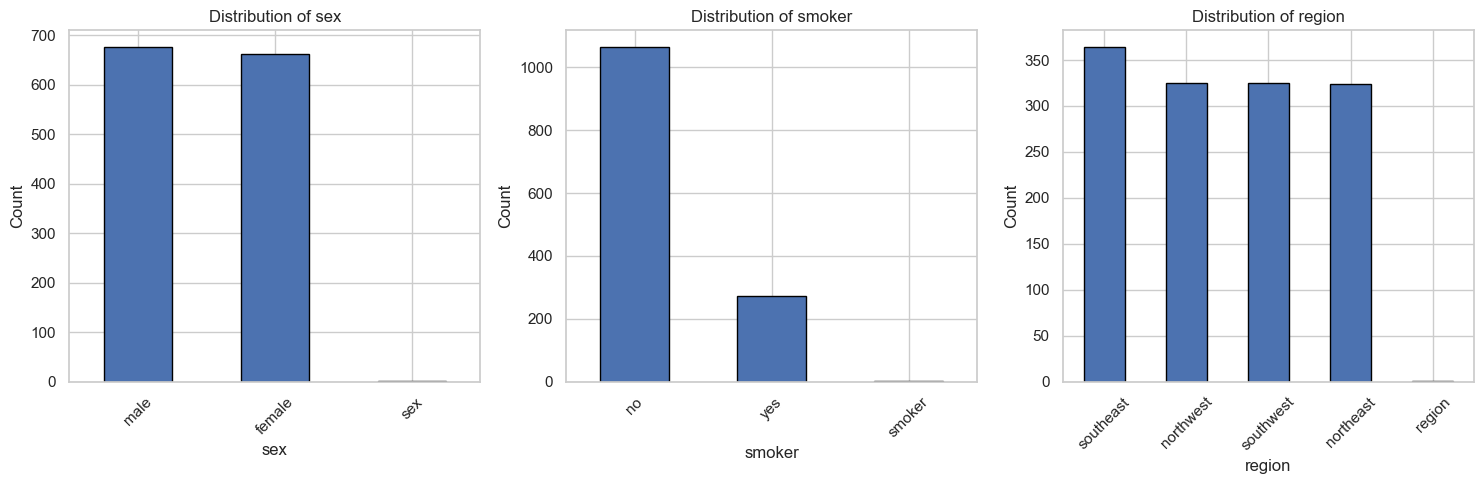

In [20]:
# Bar plots for categorical columns
n_cats = len(categorical_cols)
fig, axes = plt.subplots(nrows=(n_cats+2)//3, ncols=3, figsize=(15, 5*((n_cats+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 6. Initial Data Preparation (Data Preprocessing)

In [21]:
# Create a copy for preprocessing
df_clean = df.copy()
print(f"Original shape: {df.shape}")

Original shape: (1339, 7)


In [22]:
# Handle missing values
if df_clean.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # For numerical: fill with median
    for col in numerical_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"  Filled {col} with median: {median_val}")

    # For categorical: fill with mode
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"  Filled {col} with mode: {mode_val}")
else:
    print("No missing values found")

Handling missing values...
  Filled age with median: 39.0
  Filled bmi with median: 30.4
  Filled children with median: 1.0
  Filled charges with median: 9382.033


C:\Users\elomg\AppData\Local\Temp\ipykernel_14180\3497295030.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
C:\Users\elomg\AppData\Local\Temp\ipykernel_14180\3497295030.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [23]:
# Remove duplicates
duplicates_count = df_clean.duplicated().sum()
if duplicates_count > 0:
    print(f"Removing {duplicates_count} duplicate rows...")
    df_clean = df_clean.drop_duplicates()
    print(f"New shape: {df_clean.shape}")
else:
    print("No duplicates found")

Removing 1 duplicate rows...
New shape: (1338, 7)


In [24]:
# Standardize column names (lowercase, underscores)
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')
print("Column names after standardization:")
print(df_clean.columns.tolist())

Column names after standardization:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [25]:
# Create new calculated columns
# Update column references to use standardized names
numerical_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_clean = df_clean.select_dtypes(include='object').columns.tolist()

# Example: BMI categories if BMI column exists
if 'bmi' in df_clean.columns:
    df_clean['bmi_category'] = pd.cut(df_clean['bmi'],
                                       bins=[0, 18.5, 25, 30, float('inf')],
                                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    print("Created BMI category column")
    print(df_clean['bmi_category'].value_counts())

Created BMI category column
bmi_category
Obese          705
Overweight     386
Normal         226
Underweight     21
Name: count, dtype: int64


In [26]:
print(f"\nCleaned data shape: {df_clean.shape}")
print("\nFirst few rows of cleaned data:")
display(df_clean.head())


Cleaned data shape: (1338, 8)

First few rows of cleaned data:


,age,sex,bmi,children,smoker,region,charges,bmi_category
0,39.0,sex,30.400,1.0,smoker,region,9382.03300,Obese
1,19.0,female,27.900,0.0,yes,southwest,16884.92400,Overweight
2,18.0,male,33.770,1.0,no,southeast,1725.55230,Obese
3,28.0,male,33.000,3.0,no,southeast,4449.46200,Obese
4,33.0,male,22.705,0.0,no,northwest,21984.47061,Normal


## 7. Initial Visualizations

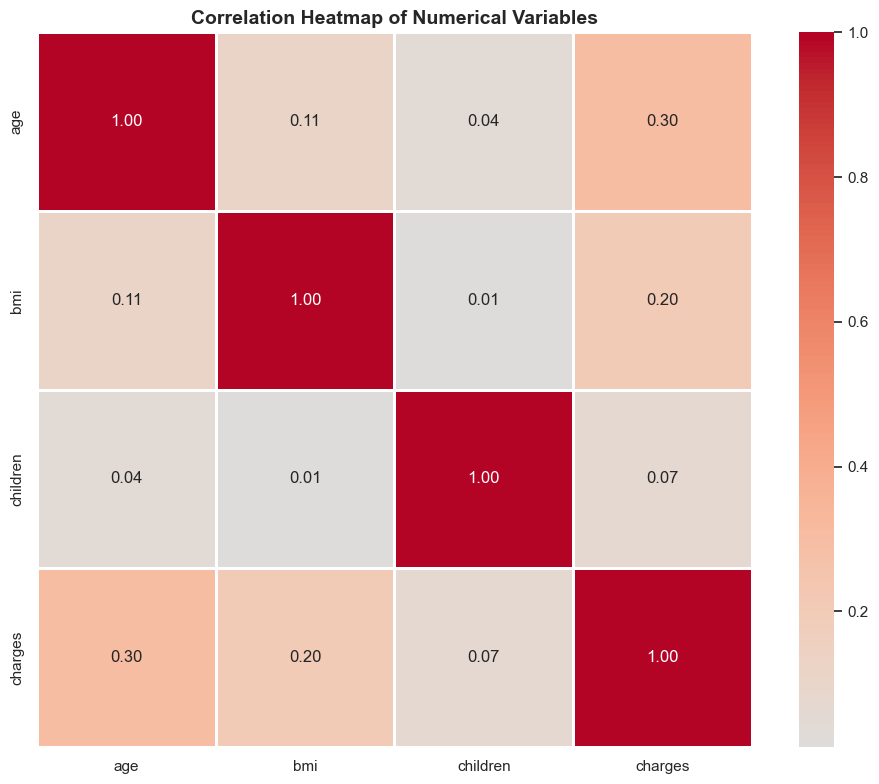

In [27]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numerical_cols_clean].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

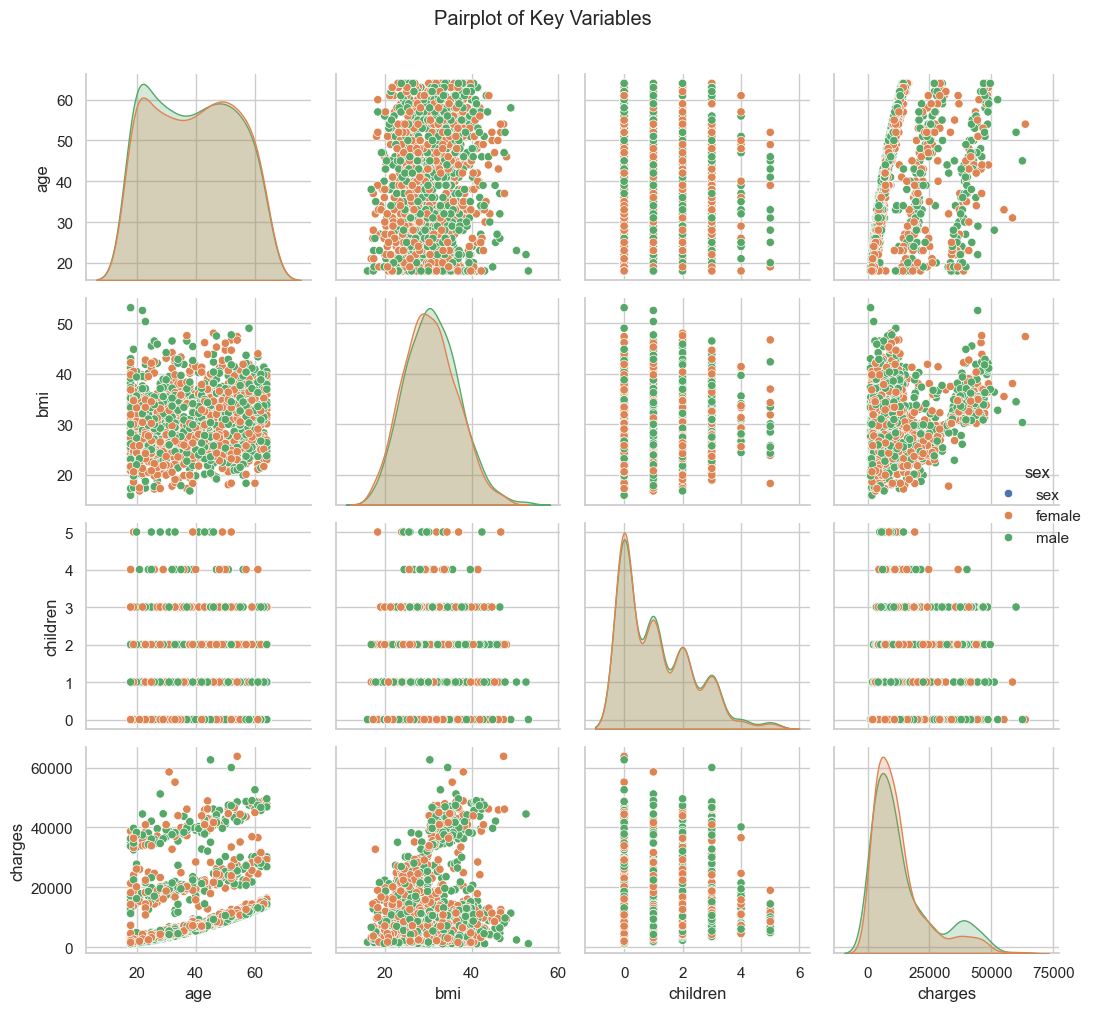

In [28]:
# Pairplot for key numerical variables
key_cols = numerical_cols_clean[:4] if len(numerical_cols_clean) > 4 else numerical_cols_clean
if len(categorical_cols_clean) > 0:
    # Use first categorical column for hue
    hue_col = categorical_cols_clean[0]
    sns.pairplot(df_clean[key_cols + [hue_col]], hue=hue_col, diag_kind='kde')
else:
    sns.pairplot(df_clean[key_cols], diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.01)
plt.tight_layout()
plt.show()

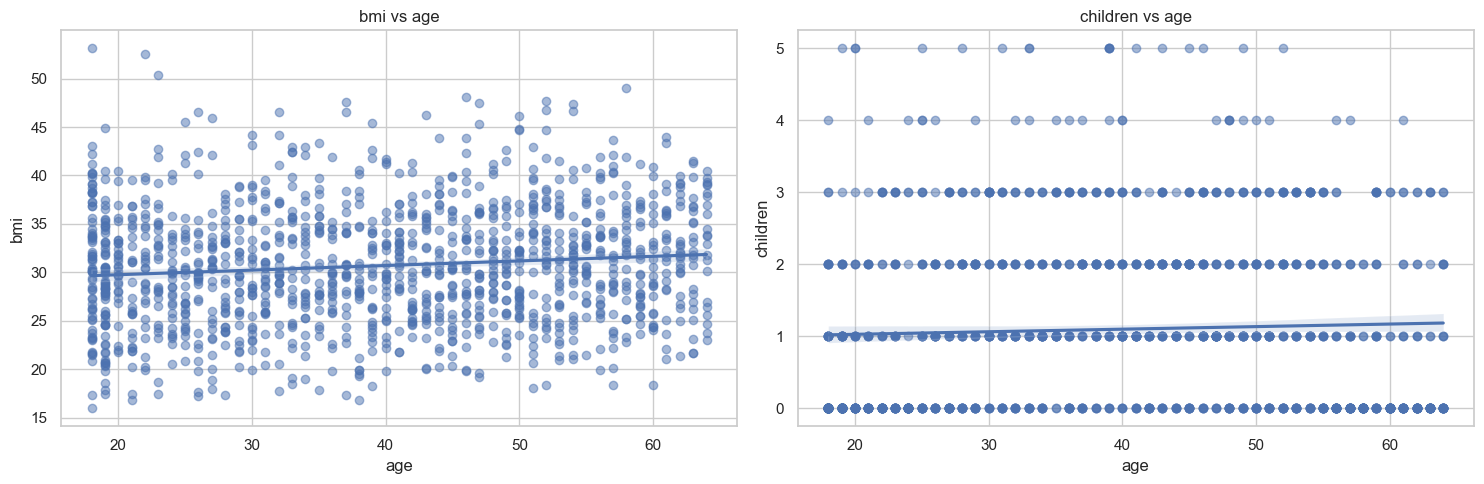

In [29]:
# Scatter plots with regression lines for key relationships
if len(numerical_cols_clean) >= 2:
    # Create scatter plots for first few numerical variable pairs
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1: First two numerical columns
    sns.regplot(data=df_clean, x=numerical_cols_clean[0], y=numerical_cols_clean[1],
                scatter_kws={'alpha':0.5}, ax=axes[0])
    axes[0].set_title(f'{numerical_cols_clean[1]} vs {numerical_cols_clean[0]}')

    # Plot 2: If there are more columns
    if len(numerical_cols_clean) >= 3:
        sns.regplot(data=df_clean, x=numerical_cols_clean[0], y=numerical_cols_clean[2],
                    scatter_kws={'alpha':0.5}, ax=axes[1])
        axes[1].set_title(f'{numerical_cols_clean[2]} vs {numerical_cols_clean[0]}')

    plt.tight_layout()
    plt.show()

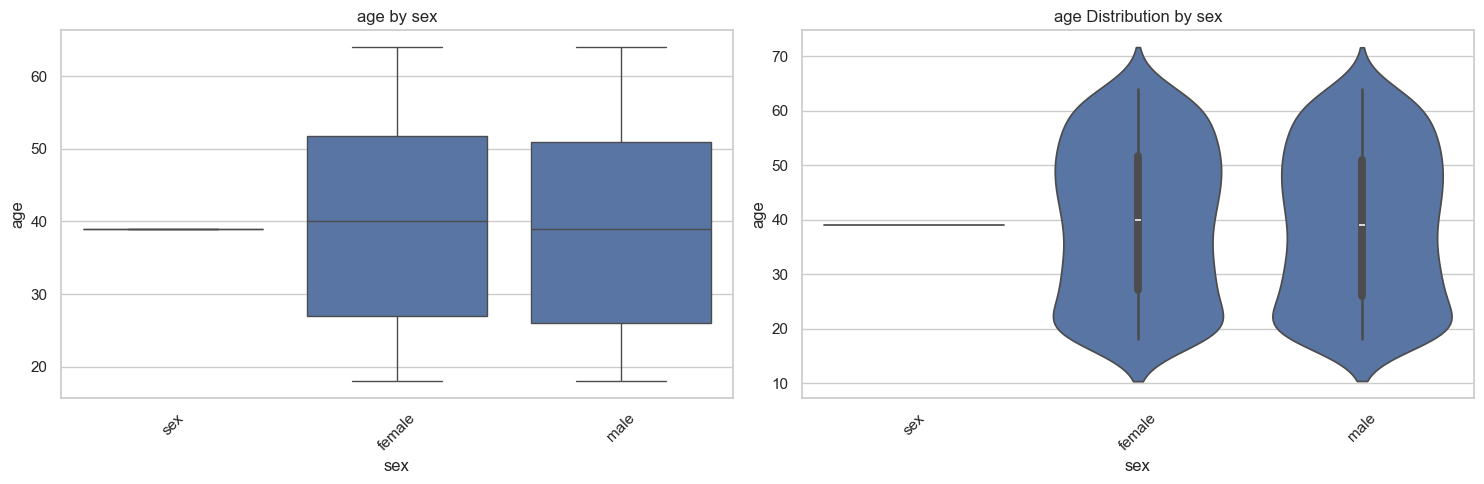

In [30]:
# Box plots by categorical variable
if len(categorical_cols_clean) > 0 and len(numerical_cols_clean) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # First categorical vs first numerical
    sns.boxplot(data=df_clean, x=categorical_cols_clean[0], y=numerical_cols_clean[0], ax=axes[0])
    axes[0].set_title(f'{numerical_cols_clean[0]} by {categorical_cols_clean[0]}')
    axes[0].tick_params(axis='x', rotation=45)

    # Violin plot alternative
    sns.violinplot(data=df_clean, x=categorical_cols_clean[0], y=numerical_cols_clean[0], ax=axes[1])
    axes[1].set_title(f'{numerical_cols_clean[0]} Distribution by {categorical_cols_clean[0]}')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

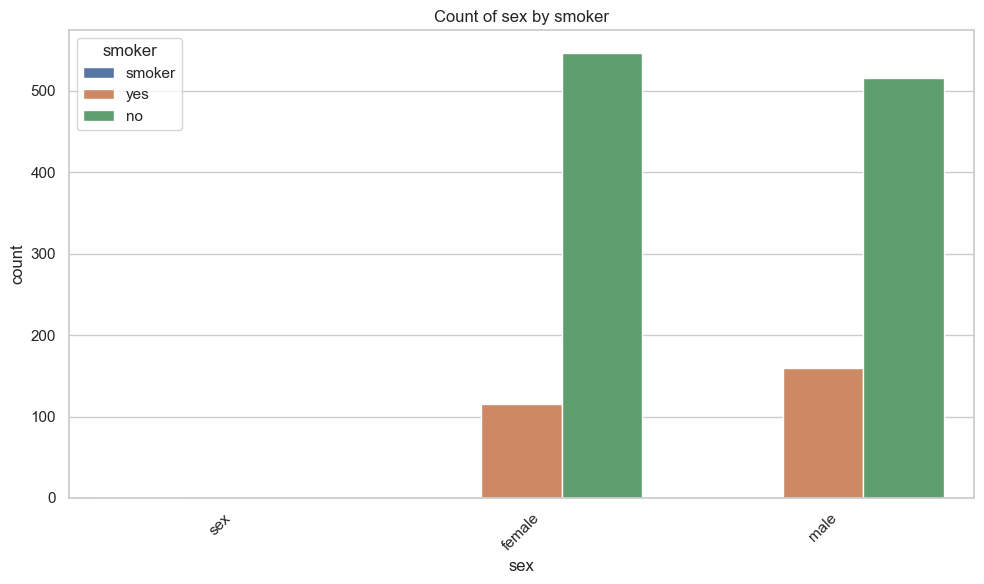

In [31]:
# Count plot for categorical variables
if len(categorical_cols_clean) >= 2:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clean, x=categorical_cols_clean[0], hue=categorical_cols_clean[1])
    plt.title(f'Count of {categorical_cols_clean[0]} by {categorical_cols_clean[1]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

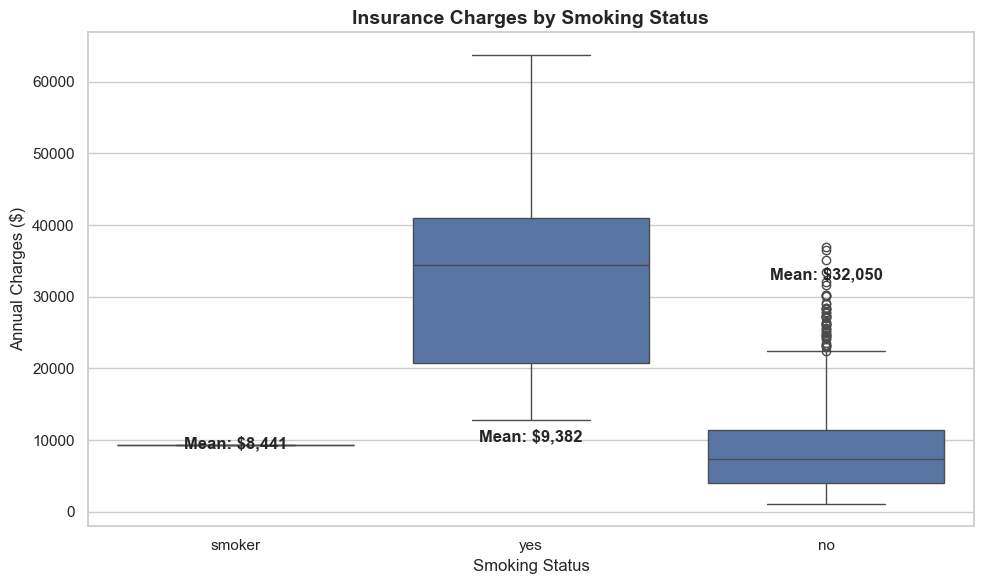

In [35]:
# Box plot of charges by smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='smoker', y='charges')
plt.title('Insurance Charges by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status')
plt.ylabel('Annual Charges ($)')

# Add mean annotations
smoker_means = df_clean.groupby('smoker')['charges'].mean()
for i, (status, mean_val) in enumerate(smoker_means.items()):
    plt.text(i, mean_val, f'Mean: ${mean_val:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


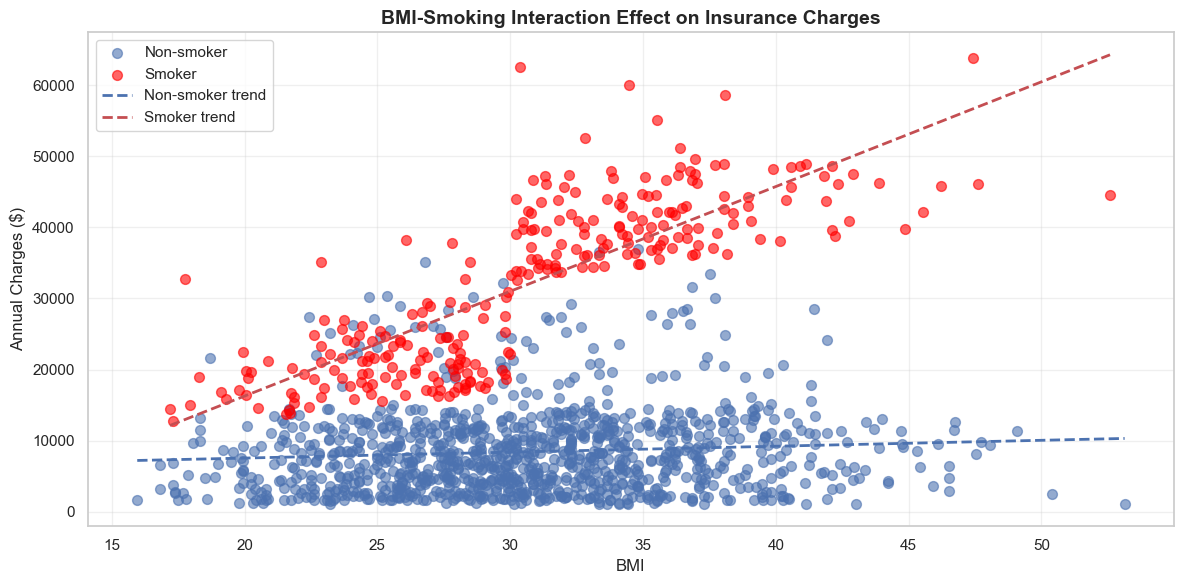

In [40]:
from scipy import stats

# Create scatter plot for BMI vs Charges with smoker interaction
plt.figure(figsize=(12, 6))

# Plot non-smokers
nonsmokers = df_clean[df_clean['smoker'] == 'no']
plt.scatter(
    nonsmokers['bmi'], nonsmokers['charges'],
    alpha=0.6, label='Non-smoker', s=50
)

# Plot smokers
smokers = df_clean[df_clean['smoker'] == 'yes']
plt.scatter(
    smokers['bmi'], smokers['charges'],
    alpha=0.6, label='Smoker', s=50, color='red'
)

# Regression line for non-smokers
slope_ns, intercept_ns, _, _, _ = stats.linregress(nonsmokers['bmi'], nonsmokers['charges'])
x_ns = np.linspace(nonsmokers['bmi'].min(), nonsmokers['bmi'].max(), 100)
plt.plot(x_ns, slope_ns * x_ns + intercept_ns, 'b--', linewidth=2, label='Non-smoker trend')

# Regression line for smokers
slope_s, intercept_s, _, _, _ = stats.linregress(smokers['bmi'], smokers['charges'])
x_s = np.linspace(smokers['bmi'].min(), smokers['bmi'].max(), 100)
plt.plot(x_s, slope_s * x_s + intercept_s, 'r--', linewidth=2, label='Smoker trend')

# Labels and formatting
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Annual Charges ($)', fontsize=12)
plt.title('BMI-Smoking Interaction Effect on Insurance Charges', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

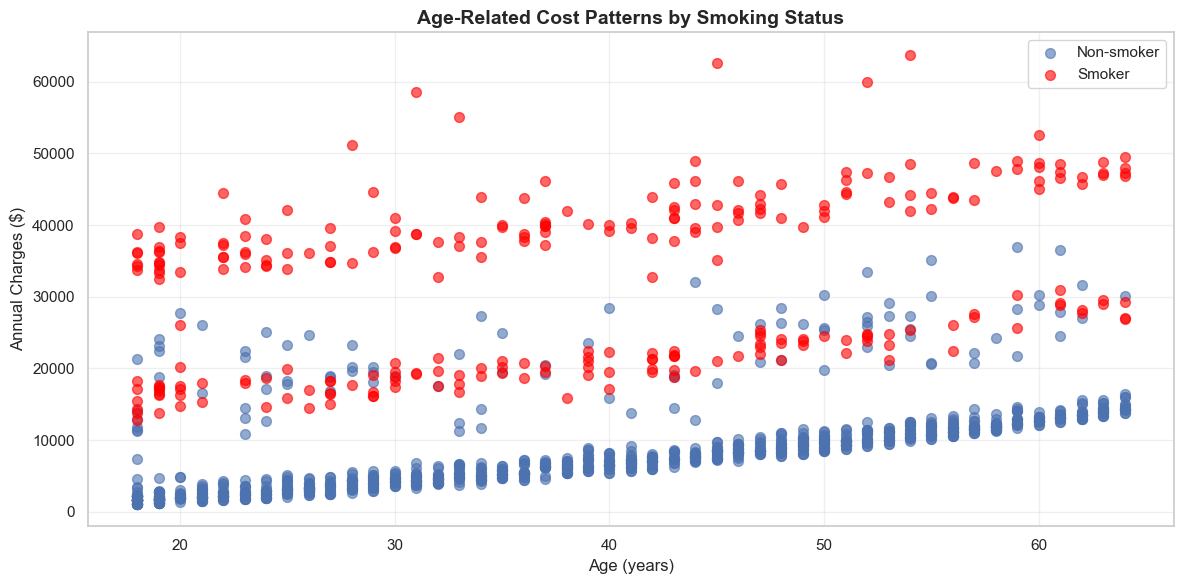

In [44]:
# --- Age vs Charges Scatter Plot (by Smoker Status) ---

import matplotlib.pyplot as plt
import seaborn as sns

# Create age vs charges scatter plot
plt.figure(figsize=(12, 6))

# Split data by smoker status
nonsmokers = df_clean[df_clean['smoker'] == 'no']
smokers = df_clean[df_clean['smoker'] == 'yes']

# Scatter plot for non-smokers
plt.scatter(
    nonsmokers['age'], nonsmokers['charges'],
    alpha=0.6, label='Non-smoker', s=50
)

# Scatter plot for smokers
plt.scatter(
    smokers['age'], smokers['charges'],
    alpha=0.6, label='Smoker', s=50, color='red'
)

# Labels and formatting
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Annual Charges ($)', fontsize=12)
plt.title('Age-Related Cost Patterns by Smoking Status', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

In [45]:
# Create comprehensive summary statistics table
summary_stats = df_clean[numerical_cols_clean].describe().T
summary_stats['missing_%'] = (df_clean[numerical_cols_clean].isnull().sum() / len(df_clean) * 100)
summary_stats['skewness'] = df_clean[numerical_cols_clean].skew()
summary_stats['kurtosis'] = df_clean[numerical_cols_clean].kurtosis()

print("\nComprehensive Summary Statistics:")
display(summary_stats)


Comprehensive Summary Statistics:


,count,mean,std,min,25%,50%,75%,max,missing_%,skewness,kurtosis
age,1338.0,39.221973,14.039081,18.0000,27.000000,39.00000,51.000000,64.00000,0.0,0.054837,-1.243086
bmi,1338.0,30.663255,6.098191,15.9600,26.296250,30.40000,34.693750,53.13000,0.0,0.284116,-0.050713
children,1338.0,1.095665,1.205123,0.0000,0.000000,1.00000,2.000000,5.00000,0.0,0.937942,0.203543
charges,1338.0,13276.208864,12106.298683,1121.8739,4746.521225,9384.09715,16639.912515,63770.42801,0.0,1.516478,1.608418


In [46]:
# Categorical variable summary
print("\nCategorical Variables Summary:")
for col in categorical_cols_clean:
    print(f"\n{col}:")
    print(f"  Unique values: {df_clean[col].nunique()}")
    print(f"  Most common: {df_clean[col].mode()[0]} ({df_clean[col].value_counts().iloc[0]} occurrences)")
    print(f"  Distribution:")
    print(df_clean[col].value_counts())


Categorical Variables Summary:

sex:
  Unique values: 3
  Most common: male (675 occurrences)
  Distribution:
sex
male      675
female    662
sex         1
Name: count, dtype: int64

smoker:
  Unique values: 3
  Most common: no (1063 occurrences)
  Distribution:
smoker
no        1063
yes        274
smoker       1
Name: count, dtype: int64

region:
  Unique values: 5
  Most common: southeast (364 occurrences)
  Distribution:
region
southeast    364
southwest    325
northwest    324
northeast    324
region         1
Name: count, dtype: int64


In [47]:
# Save cleaned data for modeling
output_path = Path('../data/insurance_cleaned.csv')
df_clean.to_csv(output_path, index=False)
print(f"\nCleaned data saved to: {output_path}")
print(f"Final dataset shape: {df_clean.shape}")


Cleaned data saved to: ..\data\insurance_cleaned.csv
Final dataset shape: (1338, 8)


## Conclusion

This exploratory data analysis has provided comprehensive insights into the insurance dataset. The cleaned and prepared data is now ready for machine learning model development. Key takeaways and patterns discovered will guide feature engineering and model selection in the next phase of the project.